In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [4]:
# copy demo into current directory
ac.copydemo('demoname')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Grow an initial orbit by continuation***")
init = ac.run(e='um2',
           unames = {1:'x',2:'y'},
           parnames = {1:'theta',2:'eps',3:'r0',4:'r1',11:'Period'},
           NDIM=2,IPS=4,ICP=['Period','r1'],
           NTST=60,IPLT=3,NBC=3,ITNW=7,
           DS=0.05,DSMIN=1e-5,DSMAX=10.0,
           THL={'Period':0},
           UZSTOP={'r1':0.6},
           NPAR=11, runner=runner)
ac.save(init, '1')

print("\n***Decrease the value of the problem parameter eps***")
decr = ac.run(init,ICP=['eps','Period'],DS='-',DSMAX=1.0,UZSTOP={'eps':0.1}, runner=runner)
ac.save(decr, '2')

print("\n***Allow the initial condition to move around a small circle***")
circle = ac.run(decr,ICP=['theta','Period'],NPR=1,DS='-',DSMIN=1e-5,
             UZSTOP={'theta': [1.25, -0.75]}, runner=runner)
ac.save(circle, '3')

Copying demo demoname ... done

***Grow an initial orbit by continuation***
Starting um2 ...

  BR    PT  TY  LAB     Period      INTEGRAL x      MAX x         MAX y           r1      
   1     1  EP    1   1.00000E-04   6.12323E-18   6.12323E-18   1.00000E-01   1.00000E-01
   1     9  UZ    2   1.78222E+00  -1.49832E-02   6.12323E-18   5.94234E-01   6.00000E-01

 Total Time    0.394E-01
um2 ... done
Saving to b.1, s.1, and d.1 ... done

***Decrease the value of the problem parameter eps***
Starting um2 ...

  BR    PT  TY  LAB      eps        INTEGRAL x      MAX x         MAX y         Period    
   1     5  UZ    3   1.00000E-01  -1.31708E-02   6.12323E-18   5.95609E-01   1.78449E+00

 Total Time    0.291E-01
um2 ... done
Saving to b.2, s.2, and d.2 ... done

***Allow the initial condition to move around a small circle***
Starting um2 ...

  BR    PT  TY  LAB     theta       INTEGRAL x      MAX x         MAX y         Period    
   1     1        4   2.50000E-01  -1.31708E-02   6.123

Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Created plot


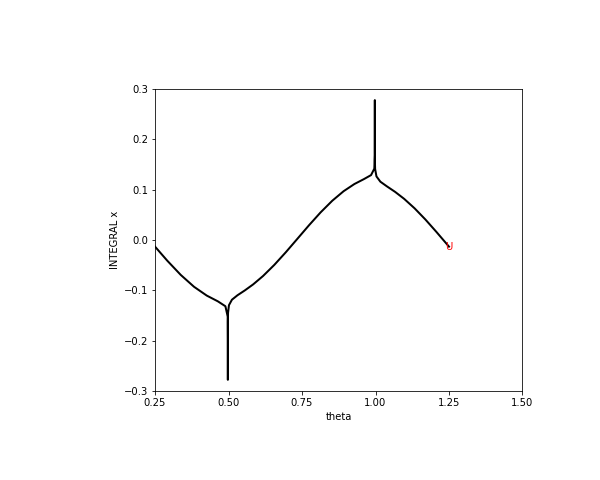

In [6]:
# plot bifurcation diagram using plot routine from AUTO

p = ac.plot('3')
p.config(grid=False)
p.savefig('b.png')
display(Image.open('b.png'))

Created plot


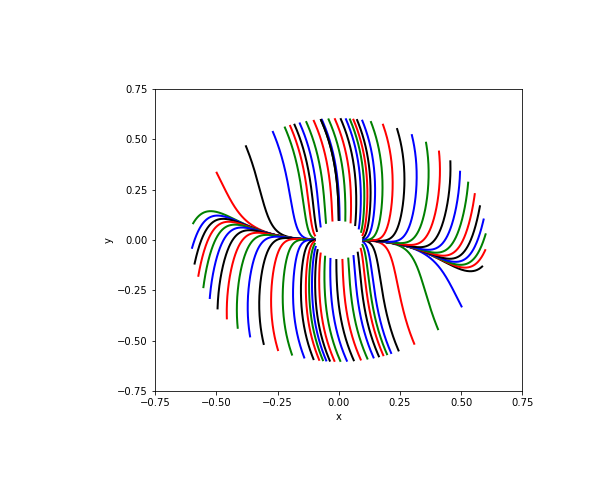

In [10]:
# plot phase portrait

p = ac.plot('3')
p.config(type='solution')
p.config(grid=False)
p.config(solution_x='x', solution_y='y')
p.config(label=list(range(4,73)))
p.savefig('b.png')
display(Image.open('b.png'))

In [11]:
# clean up files

ac.clean()
ac.delete('1')
ac.delete('2')
ac.delete('3')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.1 ... done
Deleting s.1 ... done
Deleting d.1 ... done
Deleting b.2 ... done
Deleting s.2 ... done
Deleting d.2 ... done
Deleting b.3 ... done
Deleting s.3 ... done
Deleting d.3 ... done
